In [32]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [33]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [34]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,desc

In [35]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resource/hawaii.sqlite")

In [36]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine,reflect=True)


In [37]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [38]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [39]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [41]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(desc(Measurement.date)).first()
print(most_recent_date[0])

2017-08-23


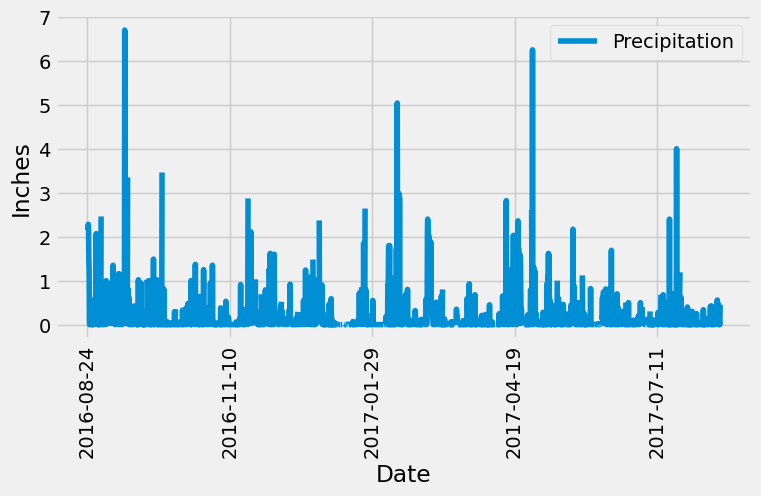

In [46]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
one_year_ago = dt.datetime.strptime(most_recent_date[0], '%Y-%m-%d') - dt.timedelta(days=365)
# Starting from the most recent data point in the database. 
precipitation_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago).all()
# Calculate the date one year from the last date in data set.

# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago).all()

   

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation_data, columns=["date", "precipitation"])

# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values(by="date")

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(x="date", y="precipitation", figsize=(8, 4), rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend(["Precipitation"])
plt.show()


In [47]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_statistics = precipitation_df["precipitation"].describe()
print(summary_statistics)

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: precipitation, dtype: float64


# Exploratory Station Analysis

In [48]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.id)).scalar()
print(total_stations)

9


In [54]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = (
    session.query(Measurement.station, func.count(Measurement.station))
    .group_by(Measurement.station)
    .order_by(desc(func.count(Measurement.station)))
    .all()
    )
for station, count in most_active_stations:
    print([station,count])

['USC00519281', 2772]
['USC00519397', 2724]
['USC00513117', 2709]
['USC00519523', 2669]
['USC00516128', 2612]
['USC00514830', 2202]
['USC00511918', 1979]
['USC00517948', 1372]
['USC00518838', 511]


In [55]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_id = most_active_stations[0][0]
temperature_stats = (
    session.query(
        func.min(Measurement.tobs),
        func.max(Measurement.tobs),
        func.avg(Measurement.tobs),
    )
    .filter(Measurement.station == most_active_station_id)
    .all()
)

# Unpack the results
lowest_temp, highest_temp, avg_temp = temperature_stats[0]

# Print the results
print([most_active_station_id, lowest_temp,highest_temp,avg_temp])


['USC00519281', 54.0, 85.0, 71.66378066378067]


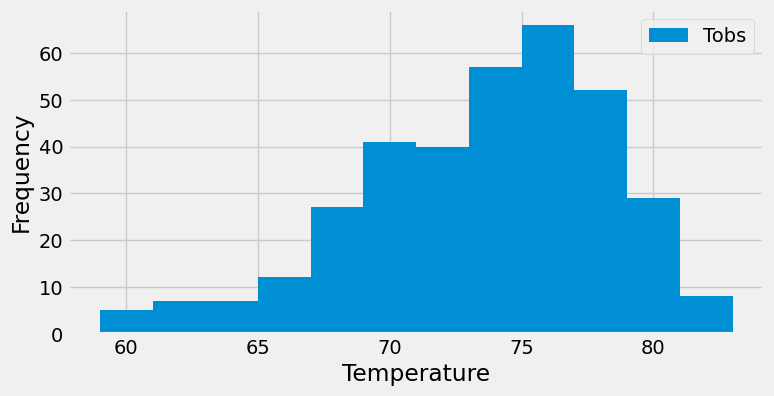

In [57]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature_data = (
    session.query(Measurement.tobs)
    .filter(Measurement.station == most_active_station_id)
    .filter(Measurement.date >= one_year_ago)
    .all()
)
temperature_df = pd.DataFrame(temperature_data, columns=["temperature"])
temperature_df.plot.hist(bins=12, figsize=(8, 4))
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(["Tobs"])
plt.show()

# Close Session

In [16]:
# Close Session
session.close()